# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Luca Mizrahi</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta. Faça o seu trabalho de maneira ética! Se você recebeu ajuda de sistemas de apoio inteligentes (por exemplo, ChatGPT, Bard, CoPilot, etc) DECLARE CLARAMENTE ONDE VOCÊ RECEBEU AJUDA para não configurar plágio (definido como "declarar como próprio o trabalho construido por outrem - neste caso um sistema computacional")

## Contexto do problema

O arquivo `cclass_cleaned.csv` contem dados a respeito de preços e características de veículos da marca Mercedes, modelo C-Class, vendidos no Reino Unido. Os dados originais, em `cclass.csv`, foram pre-processados e filtrados no *notebook* `analise_exploratoria.ipynb`, consulte o *notebook* para mais detalhes.

O dataset foi obtido de https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes.

---

**VAMOS TRABALHAR COM O ARQUIVO `cclass_cleaned.csv`, OK?**

---

Eis a descrição das colunas deste *dataset*:

| coluna       | descrição                            | tipo da coluna |
|--------------|--------------------------------------|----------------|
| year         | ano de registro                      | inteiro        |
| price        | preço em libras esterlinas           | número real    |
| transmission | tipo de transmissão                  | categórica     |
| mileage      | o quanto o carro já rodou, em milhas | número real    |
| fuelType     | tipo de combustível                  | categórica     |
| engineSize   | cilindrada, em litros                | número real    |

O target é o preço do carro.

## Separação treinamento-teste e análise exploratória

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [33]:
def load_data():
    df = pd \
        .read_csv('cclass_cleaned.csv') \
        .astype({ \
            'year': 'int', \
            'price': 'float', \
            'transmission': 'category', \
            'mileage': 'float', \
            'fuelType': 'category', \
            'engineSize': 'float', \
        })
    X = df.drop('price', axis=1).copy()
    y = df['price'].copy()
    return X, y

X, y = load_data()

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          3850 non-null   int32   
 1   transmission  3850 non-null   category
 2   mileage       3850 non-null   float64 
 3   fuelType      3850 non-null   category
 4   engineSize    3850 non-null   float64 
dtypes: category(2), float64(2), int32(1)
memory usage: 83.1 KB


In [35]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3850 entries, 0 to 3849
Series name: price
Non-Null Count  Dtype  
--------------  -----  
3850 non-null   float64
dtypes: float64(1)
memory usage: 30.2 KB


In [36]:
X.head()

,year,transmission,mileage,fuelType,engineSize
0,2015,Semi-Auto,37020.0,Diesel,1.6
1,2019,Semi-Auto,3076.0,Petrol,3.0
2,2014,Semi-Auto,55731.0,Diesel,2.1
3,2018,Automatic,13910.0,Diesel,2.1
4,2019,Automatic,500.0,Petrol,3.0


In [37]:
y.head()

0    13500.0
1    42099.0
2    12100.0
3    21691.0
4    38995.0
Name: price, dtype: float64

In [38]:
X.select_dtypes(include=['category']).describe()

,transmission,fuelType
count,3850,3850
unique,3,3
top,Semi-Auto,Diesel
freq,2070,2319


In [39]:
X.select_dtypes(include=np.number).describe()

,year,mileage,engineSize
count,3850.000000,3850.00000,3850.000000
mean,2017.467532,21568.03039,2.034338
std,1.812921,21066.33874,0.480706
min,2010.000000,1.00000,1.500000
25%,2016.000000,5999.00000,2.000000
50%,2018.000000,14417.50000,2.000000
75%,2019.000000,31570.25000,2.100000
max,2020.000000,170000.00000,6.200000


In [40]:
y.describe()

count     3850.000000
mean     23888.690649
std       8777.827461
min       4294.000000
25%      17890.000000
50%      23000.000000
75%      28980.000000
max      88995.000000
Name: price, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [42]:
X_train.columns

Index(['year', 'transmission', 'mileage', 'fuelType', 'engineSize'], dtype='object')

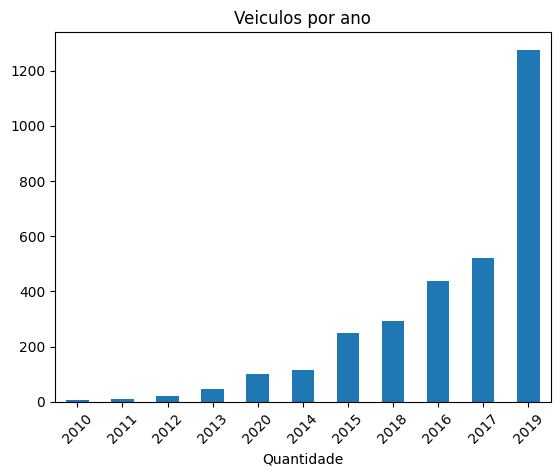

In [43]:
X_train['year'].value_counts().sort_values().plot.bar(rot=45)
plt.title('Veiculos por ano')
plt.xlabel('Quantidade')
plt.show()

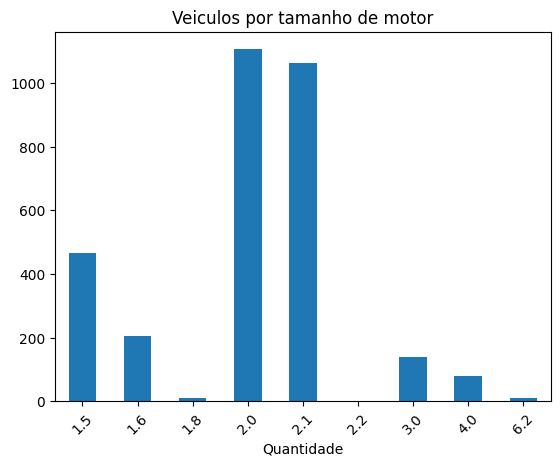

In [44]:
X_train['engineSize'].value_counts().sort_index().plot.bar(rot=45)
plt.title('Veiculos por tamanho de motor')
plt.xlabel('Quantidade')
plt.show()

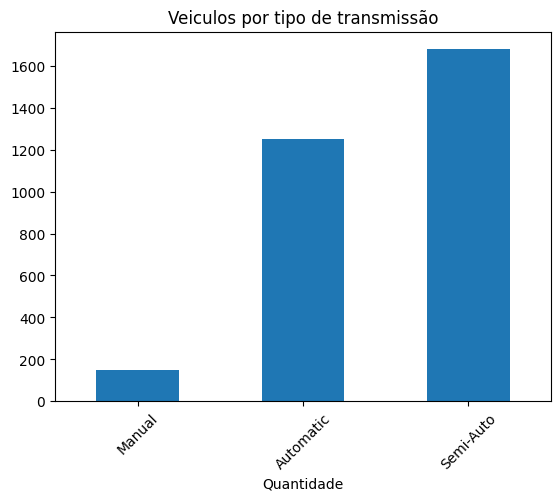

In [45]:
X_train['transmission'].value_counts().sort_values().plot.bar(rot=45)
plt.title('Veiculos por tipo de transmissão')
plt.xlabel('Quantidade')
plt.show()

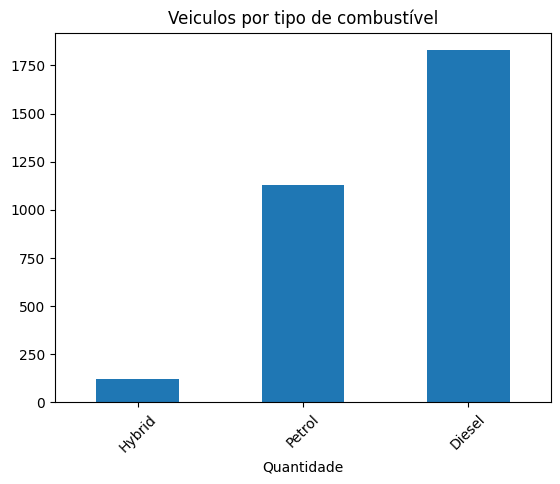

In [46]:
X_train['fuelType'].value_counts().sort_values().plot.bar(rot=45)
plt.title('Veiculos por tipo de combustível')
plt.xlabel('Quantidade')
plt.show()

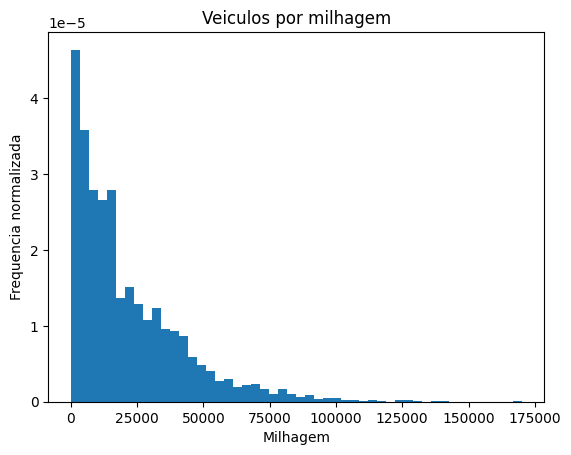

In [47]:
X_train['mileage'].plot.hist(bins=50, density=True)
plt.title('Veiculos por milhagem')
plt.xlabel('Milhagem')
plt.ylabel('Frequencia normalizada')
plt.show()

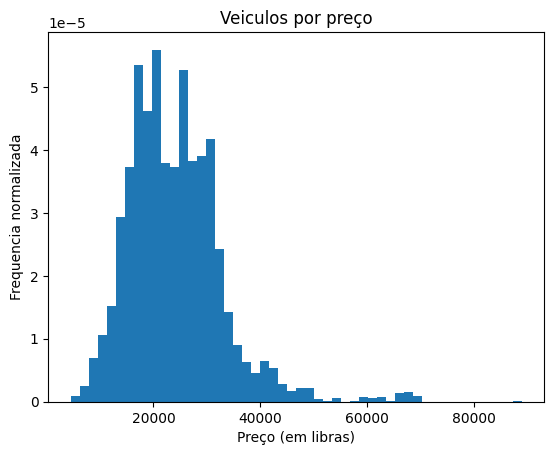

In [48]:
y_train.plot.hist(bins=50, density=True)
plt.title('Veiculos por preço')
plt.xlabel('Preço (em libras)')
plt.ylabel('Frequencia normalizada')
plt.show()

## Questões

### Questão 1: Modelo linear simples

a) (1.0 pt) Construa uma pipeline contendo:

- A codificação das variáveis categóricas usando `OneHotEncoding`
- Um modelo de regressão linear para a previsão de preços

Ou seja, a pipeline fica assim:

![diagrama da pipeline simples](pipeline_simples.png "Pipeline simples")

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3080 entries, 3694 to 3174
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          3080 non-null   int32   
 1   transmission  3080 non-null   category
 2   mileage       3080 non-null   float64 
 3   fuelType      3080 non-null   category
 4   engineSize    3080 non-null   float64 
dtypes: category(2), float64(2), int32(1)
memory usage: 90.5 KB


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columns_num = [
    'year',
    'mileage',
    'engineSize',
]

columns_cat = [
    'transmission',
    'fuelType'
]

pipe_num = Pipeline([
    ('pass', 'passthrough'),
])

pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False)),
])

pipe = ColumnTransformer([
    ('num', pipe_num, columns_num),
    ('cat', pipe_cat, columns_cat),
])

X_train_processed = pipe.fit_transform(X_train)

#Finaliza a Pipeline com o modelo de regressão linear
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train_processed

array([[2.0160e+03, 4.7140e+04, 2.1000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0160e+03, 2.7574e+04, 2.1000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 2.3637e+04, 2.1000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0170e+03, 3.2688e+04, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0190e+03, 1.3624e+04, 1.5000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0180e+03, 2.0173e+04, 2.1000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

b) (0.5 pt) Analise o desempenho RMSE do modelo de regressão linear usando validação cruzada com 5 partições. 

Dica: use a métrica `"neg_mean_squared_error"` no argumento `scoring` da função `cross_val_score`, e corrija adequadamente os escores obtidos.

In [83]:
# Analisar o desempenho RMSE do modelo de regressão linear usando validação cruzada com 5 partições

from sklearn.model_selection import cross_val_score

result_lin = cross_val_score(
    model,
    X_train_processed,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

In [84]:
result_lin = np.sqrt(-result_lin)
result_lin

array([3903.63461027, 4343.51236653, 4117.97143835, 4441.39114749,
       3834.88277424])

In [85]:
np.mean(result_lin), np.std(result_lin)

(4128.27846737382, 237.07269430490047)

O modelo de regressão linear simples apresenta RMSE médio de 4128.33 , com desvio padrão de 237.07

### Questão 2: Modelo linear com regularização e *feature engineering*

Para esta questão vamos usar um transformador customizado:

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin


class MeuTransformador(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['log_mileage'] = np.log1p(X['mileage'])
        return X

a) (1.0 pt) Construa uma pipeline contendo:

- Um estágio de preprocessamento contendo:

    - Para as colunas numéricas, aplique a sequencia de:

        - `transformador`: `MeuTransformador`

        - `scaler`: `StandardScaler`

        - `poly`: `PolynomialFeatures, de grau 1`

    - Para as colunas categóricas, `OneHotEncoding`

- Em seguida, um modelo `Ridge` com `alpha = 1`

A pipeline fica assim:

![diagrama da pipeline complexa](pipeline_complexa.png "Pipeline complexa")

In [26]:
columns_num

['year', 'mileage', 'engineSize']

In [27]:
columns_cat

['transmission', 'fuelType']

In [59]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

# Estágio de preprocessamento
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('transformador', MeuTransformador()),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1))
    ]), columns_num),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), columns_cat)
])

# Modelo Ridge
model = Ridge(alpha=1)

# Pipeline completa
pipeline_complexa = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [60]:
# Estágio de preprocessamento
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('transformador', MeuTransformador()),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1))
    ]), columns_num),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), columns_cat)
])

X_train_processed2 = preprocessor.fit_transform(X_train)

In [63]:
model = Ridge(alpha=1)

result_ridge2 = cross_val_score(
    model,
    X_train_processed2,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

result_ridge2 = np.sqrt(-result_ridge2)
np.mean(result_ridge2), np.std(result_ridge2)

(3831.429614248193, 200.1829619249096)

b) (0.5 pt) Analise o desempenho RMSE desta pipeline complexa com o modelo Ridge usando validação cruzada com 5 partições. 

Dica: use a métrica `"neg_mean_squared_error"` no argumento `scoring` da função `cross_val_score`, e corrija adequadamente os escores obtidos.

In [75]:
# Faça a validação cruzada do modelo

result_ridge = cross_val_score(
    pipeline_complexa,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

In [76]:
result_ridge = np.sqrt(-result_ridge)
result_ridge

array([3717.25114711, 3917.58300032, 3831.94335558, 4144.79516003,
       3545.58677754])

In [77]:
# Analisar a média e o desvio padrão da validação cruzada
np.mean(result_ridge), np.std(result_ridge)

(3831.4318881165827, 200.18165988734103)

O modelo com regularização e feature engeneering possui um RMSE médio de 3831,43, com desvio padrão de 200.18 

### Questão 3: Ajuste de hiperparâmetros

a) (1.5 pts) Para a *pipeline* da questão 2b, use `GridSearchCV` para procurar o melhor conjunto de hiperparâmetros de acordo com o *grid* abaixo: 

(Estamos assumindo que você chamou o estágio do modelo de `model`, o estágio de pré-processamento de `preprocessor`, contendo uma sub-pipeline chamada `num`, com um estágio `PolynomialFeatures` chamado `poly`. Ajuste os nomes de acordo com seu próprio código. Entender isso aqui faz parte da questão.)

In [64]:
# Uso do GridSearchCV para encontrar os melhores hiperparâmetros para o pipeline da questão 2b
from sklearn.model_selection import GridSearchCV


param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'preprocessor__num__poly__degree': [1, 2, 3, 4],
}

grid_search = GridSearchCV(pipeline_complexa, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('transformador',
                                                                                          MeuTransformador()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=1))]),
                                                                         ['year',
                                                                          'mileage',
                                                                          'engineSize']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['transmission',
                                                                          'fuelType'])])),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100],
                         'preprocessor__num__poly__degree': [1, 2, 3, 4]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'model__alpha': 1, 'preprocessor__num__poly__degree': 3}

In [68]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transformador',
                                                                   MeuTransformador()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['year', 'mileage',
                                                   'engineSize']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['transmission',
                                                   'fuelType'])])),
                ('model', Ridge(alpha=1))])

In [70]:
# Construindo a pipeline complexa otimizada com os parâmetros do GridSearchCV

# Estágio de preprocessamento
preprocessor2 = ColumnTransformer([
    ('num', Pipeline([
        ('transformador', MeuTransformador()),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=3))
    ]), columns_num),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), columns_cat)
])

# Modelo Ridge
model2 = Ridge(alpha=1)

# Pipeline completa
pipeline_complexa2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('model', model2)
])

b) (0.5 pt) Analise o desempenho RMSE desta pipeline complexa otimizada (i.e. pós `GridSearchCV`) usando validação cruzada com 5 partições. 

Dica: use a métrica `"neg_mean_squared_error"` no argumento `scoring` da função `cross_val_score`, e corrija adequadamente os escores obtidos.

In [81]:
# Faça a validação cruzada do modelo

result_ridge2 = cross_val_score(
    pipeline_complexa2,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

In [82]:
result_ridge2 = np.sqrt(-result_ridge2)
np.mean(result_ridge2), np.std(result_ridge2)

(2842.0964417075156, 143.82042486654566)

O modelo com regularização e feature engeneering e otimizado pelo GridSeachCV possui um RMSE médio de 2842,09, com desvio padrão de 143,82 

### Questão 4: Escolha de modelo

(1.0 pt) Compare os desempenhos (obtidos com validação cruzada) dos modelos nas questões 1b, 2b e 3b. Qual deles tem o melhor desempenho?

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Defina os modelos que você deseja comparar
models = [model, pipeline_complexa, pipeline_complexa2]

# Crie listas para armazenar os resultados
rmse_mean = []
rmse_std = []

# Calcule o RMSE médio e o desvio padrão para cada modelo
for model in models:
    # Realize a validação cruzada com 5 partições
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores)
    
    # Calcule o RMSE médio e o desvio padrão
    rmse_mean.append(np.mean(rmse))
    rmse_std.append(np.std(rmse))

# Imprima os resultados
for i, model in enumerate(models):
    print(f"Model {i+1}:")
    print(f"RMSE mean: {rmse_mean[i]}")
    print(f"RMSE std: {rmse_std[i]}")
    print()


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import ttest_ind


# Os resultados dos cross val: result_lin, result_ridge, result_ridge2, 

# Realização do teste t entre os modelos para observar se há diferença nos desempenhos médios

# Realize o teste t entre os modelos
t_statistic1, p_value1 = ttest_ind(result_lin, result_ridge)
print("Regressão Linear x Ridge V1")
print(f"T-Statistic: {t_statistic1}")
print(f"P-Value: {p_value1}\n")

t_statistic2, p_value2 = ttest_ind(result_lin, result_ridge2)
print("Regressão Linear x Ridge V2")
print(f"T-Statistic: {t_statistic2}")
print(f"P-Value: {p_value2}\n")

t_statistic3, p_value3 = ttest_ind(result_ridge, result_ridge2)
print("Ridge V1 x Ridge V2")
print(f"T-Statistic: {t_statistic3}")
print(f"P-Value: {p_value3}\n")

Regressão Linear x Ridge V1
T-Statistic: 1.9133863253385484
P-Value: 0.09204946476797947

Regressão Linear x Ridge V2
T-Statistic: 9.276919315371067
P-Value: 1.4822198882878253e-05

Ridge V1 x Ridge V2
T-Statistic: 8.027408482494707
P-Value: 4.260591934809288e-05



In [96]:
# Threshold de significância estatística 
alpha = 0.05

if p_value1 < alpha:
    print("Rejeitar a hipótese nula: Há diferença significativa entre os modelos Regressão Linear e Ridge V1\n")
else:
    print("Aceitar a hipótese nula: Não há diferença significativa entre os modelos Regressão Linear e Ridge V1\n")

if p_value2 < alpha:
    print("Rejeitar a hipótese nula: Há diferença significativa entre os modelos Regressão Linear e Ridge V2\n")
else:
    print("Aceitar a hipótese nula: Não há diferença significativa entre os modelos Regressão Linear e Ridge V2\n")

if p_value3 < alpha:
    print("Rejeitar a hipótese nula: Há diferença significativa entre os modelos Ridge V1 e Ridge V2\n")
else:
    print("Aceitar a hipótese nula: Não há diferença significativa entre os modelos Ridge V1 e Ridge V2\n")

Aceitar a hipótese nula: Não há diferença significativa entre os modelos Regressão Linear e Ridge V1

Rejeitar a hipótese nula: Há diferença significativa entre os modelos Regressão Linear e Ridge V2

Rejeitar a hipótese nula: Há diferença significativa entre os modelos Ridge V1 e Ridge V2



Conclusão: o modelo Ridge V2 (item 3b da prova), otimizado pelo GridSearchCV é melhor que os outros 2 modelos com significância estatística de 5% por meio de um teste t realizado entre todos os modelos, além de possuir o menor RMSE dentre os 3 modelos construídos. Dessa forma esse é o modelo que será escolhido para o teste final.

### Questão 6: Teste final

a) (1.0 pt) Meça o desempenho do melhor modelo:

- Treine no conjunto de treinamento completo

- Teste no conjunto de teste (finalmente)

In [99]:
# Treinar o modelo Ridge V2 com os dados de treino

pipeline_complexa2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transformador',
                                                                   MeuTransformador()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['year', 'mileage',
                                                   'engineSize']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['transmission',
                                                   'fuelType'])])),
                ('model', Ridge(alpha=1))])

In [102]:
# Testar no conjunto de teste

y_pred = pipeline_complexa2.predict(X_test)


In [103]:
# Calcular o RMSE no conjunto de teste

rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_final

2813.1709847967563

b) (1.0 pt) Interprete o desempenho final do modelo: o que o RMSE final representa para um consumidor que quer comprar um Mercedes C-Class usado?

O RMSE é um medida de erro em modelos de predição de dados e dado que estamos construindo um modelo de previsão do preço dos carros da categoria C-Class da Mercedes, um menor RMSE indicaria que o modelo consegue, em média, fornecer um boa estimativa de um Mercedes C-Class baseado nas features dessa base de dados que estamos trabalhando. 

No caso do modelo realizado, o RMSE final foi de 2813 libras, o que significa que o modelo tende a errar o preço do carro, em média, para cima ou para baixo nesse valor do RMSE. Ou seja, do ponto de vista de um consumidor que gostaria de comprar um Mercedes usado, ao utilizar este modelo ele teria uma melhor noção de quanto o carro vale, considerando que o valor real pode estar nesse intervalo: Valor previsto pelo modelo +- 2813. Assim, o consumidor conseguiria tomar decisões mais informadas em relação a compra de um carro usado, sem sofrer um "golpe" muito significativo (Carro sendo ofertado 10.000 libras mais caro do que seu preço "justo").

No entanto, dado que o modelo apresenta esse RMSE, é possível que o valor dos veículos esteja distorcido nessa margem, o que poderia resultar no consumidor pagando um valor de 2000 a mais em relação ao valor "justo" do carro, determinado por algum outro método.

### Questão 7

(1.0 pt) Dê um exemplo de uma atividade de um aluno do Insper que ilustra o conceito de alta precisão em machine learning. Não use exemplos de algoritmos de machine learning.

Uma atividade muito comum ao aluno Insper que abrange o conceito de alta precisão em machine learning é o contexto de uma prova. Considerando que o conceito de alta precisão envolve justamente a quantidade de acertos (True Positives) para todos as classificações positivos, em um contexto de uma prova de múltipla escolha de identificar a alternativa correta, o aluno busca sempre classificar como positiva a alternativa que realmente é a positiva. Dessa forma, é possível observar que nesse contexto o aluno busca o maior precision possível(100%), já que caso todas as alternativas corretas sejam assinaladas, o aluno teria tirado 10 com precision máximo, dado que nenhum alternativa falsa foi classificada como positiva (False Positive = 0).

---

O chat GPT foi utilizado nessa questão com o seguinte prompt: 

Uma atividade muito comum ao aluno Insper que abrange o conceito de alta precisão em machine learning é o contexto de uma prova. Considerando que o conceito de alta precisão envolve justamente a quantidade de acertos (True Positives) para todos as classificações positivos, em um contexto de uma prova de múltipla escolha de identificar a alternativa correta, o aluno busca sempre classificar como positiva a alternativa que realmente é a positiva. Dessa forma, é possível observar que nesse contexto o aluno busca o maior precision possível(100%), já que caso todas as alternativas corretas sejam assinaladas, o aluno teria tirado 10 com precision máximo, dado que nenhum alternativa falsa foi classificada como positiva (False Positive).

Essa resposta criada por mim está coerente com a pergunta anterior?

### Questão 8

(1.0 pt) Perguntei ao ChatGPT: 

"Porque a validação cruzada é melhor do que a separação simples treinamento-teste na identificação do melhor modelo dentre várias escolhas? E porque temos que testar o melhor modelo em uma amostra separada de teste?"

ChatGPT respondeu:

"A validação cruzada é geralmente considerada melhor do que uma simples separação treinamento-teste na identificação do melhor modelo dentre várias escolhas por algumas razões:

1. Utilização mais eficiente dos dados: Na validação cruzada, os dados são divididos em k conjuntos (ou "dobras"). O modelo é treinado k vezes, cada vez usando k-1 conjuntos para treinamento e o restante para teste. Isso permite que cada observação seja usada tanto para treinamento quanto para teste, aumentando a eficiência do uso dos dados.

2. Avaliação mais robusta do desempenho do modelo: Como o modelo é testado várias vezes em diferentes conjuntos de dados de teste, a avaliação do desempenho é mais robusta e menos sensível à aleatoriedade na divisão dos dados. Isso ajuda a reduzir a possibilidade de avaliar erroneamente o desempenho de um modelo devido a uma única divisão de treinamento-teste.

3. Redução do viés na avaliação do desempenho: A validação cruzada tende a fornecer estimativas menos tendenciosas do desempenho do modelo, especialmente em conjuntos de dados pequenos, onde uma única divisão de treinamento-teste pode levar a estimativas muito variáveis do desempenho.

Quanto à necessidade de testar o melhor modelo em uma amostra separada de teste, isso é importante para avaliar o desempenho do modelo em dados não vistos, ou seja, dados que não foram usados durante o treinamento ou na validação cruzada. Isso ajuda a garantir que o modelo seja capaz de generalizar bem para novos dados e não esteja simplesmente "memorizando" os dados de treinamento. A amostra de teste separada fornece uma avaliação final independente do desempenho do modelo antes de ser implantado em produção ou usado para fazer previsões em novos dados."

Uma destas respostas é redundante. Qual delas? Redundante com qual outra resposta? Explique.


A resposta que pode ser considerada redundante é:

3. Redução do viés na avaliação do desempenho

Esta resposta é parcialmente redundante com a 2. Avaliação mais robusta do desempenho do modelo:, pois ambas abordam o conceito de que a validação cruzada ajuda a obter uma visão mais confiável e estável do desempenho do modelo ao mitigar a aleatoriedade e variação que podem advir de uma única divisão dos dados. Enquanto a resposta 3 se concentra mais especificamente no viés da avaliação do desempenho, a resposta 2 abrange um conceito mais amplo que inclui tanto a variação (ou volatilidade) quanto o viés nas estimativas de desempenho. A ideia central em ambas é que, ao usar várias divisões de dados para treinamento e teste, a validação cruzada fornece uma medida mais confiável do verdadeiro desempenho do modelo.

A redundância surge porque a "redução do viés" na avaliação do desempenho é parte integrante do que torna a avaliação do desempenho "mais robusta". Em outras palavras, uma das maneiras pela qual a avaliação se torna mais robusta é precisamente pela redução do viés (junto com a redução da variância das estimativas de desempenho), o que é conseguido ao usar diferentes subconjuntos de dados para treinamento e teste em várias iterações. Ambas as respostas tocam na ideia de que a validação cruzada ajuda a garantir que o desempenho estimado do modelo seja representativo do seu desempenho em novos dados, minimizando a chance de uma avaliação incorreta devido a escolhas específicas de divisão de dados.

---

O chat GPT foi usado nessa questão com o seguinte prompt: 

"Porque a validação cruzada é melhor do que a separação simples treinamento-teste na identificação do melhor modelo dentre várias escolhas? E porque temos que testar o melhor modelo em uma amostra separada de teste?"

ChatGPT respondeu:

"A validação cruzada é geralmente considerada melhor do que uma simples separação treinamento-teste na identificação do melhor modelo dentre várias escolhas por algumas razões:

1. Utilização mais eficiente dos dados: Na validação cruzada, os dados são divididos em k conjuntos (ou "dobras"). O modelo é treinado k vezes, cada vez usando k-1 conjuntos para treinamento e o restante para teste. Isso permite que cada observação seja usada tanto para treinamento quanto para teste, aumentando a eficiência do uso dos dados.

2. Avaliação mais robusta do desempenho do modelo: Como o modelo é testado várias vezes em diferentes conjuntos de dados de teste, a avaliação do desempenho é mais robusta e menos sensível à aleatoriedade na divisão dos dados. Isso ajuda a reduzir a possibilidade de avaliar erroneamente o desempenho de um modelo devido a uma única divisão de treinamento-teste.

3. Redução do viés na avaliação do desempenho: A validação cruzada tende a fornecer estimativas menos tendenciosas do desempenho do modelo, especialmente em conjuntos de dados pequenos, onde uma única divisão de treinamento-teste pode levar a estimativas muito variáveis do desempenho.

Quanto à necessidade de testar o melhor modelo em uma amostra separada de teste, isso é importante para avaliar o desempenho do modelo em dados não vistos, ou seja, dados que não foram usados durante o treinamento ou na validação cruzada. Isso ajuda a garantir que o modelo seja capaz de generalizar bem para novos dados e não esteja simplesmente "memorizando" os dados de treinamento. A amostra de teste separada fornece uma avaliação final independente do desempenho do modelo antes de ser implantado em produção ou usado para fazer previsões em novos dados."

Uma destas respostas é redundante. Qual delas? Redundante com qual outra resposta? Explique.